###  Compute times series that describe the Walker Circulation

In [138]:
using CairoMakie
using GeoMakie
using NCDatasets
using Statistics
using GLM
using Polynomials
using DataFrames
using CSV

include("ensoFuncs.jl")
#datapath="/Users/C823281551/data/ERA5/"
#file2=datapath+"era5_omega_pv_vort_500hPa_1990th2024_360x180_jan.nc"
#file3=datapath+"era5_omega_pv_vort_500hPa_1990th2024_360x180_jul.nc" 

test_num_nina (generic function with 1 method)

In [139]:
path="/Users/C823281551/data/ERA5/"
file1   = path*"era5_omega_pv_vort_500hPa_1990th2024_360x180.nc"
file2   = path*"era5_sst_1990th2024_360x180.nc"
#file2   = path*"era5_omega_pv_vort_500hPa_1990th2024_360x180_jul.nc"
tag = "ERA5 July"
data   = NCDataset(file1);
data2  = NCDataset(file2);
#
lat = data["lat"]
lon = data["lon"]
tme = data["valid_time"]
wap = data["w"]
sst = data2["sst"]
lat2 = data2["lat"]
lon2 = data2["lon"]

lon (360)
  Datatype:    Float64 (Float64)
  Dimensions:  lon
  Attributes:
   standard_name        = longitude
   long_name            = longitude
   units                = degrees_east
   axis                 = X


In [140]:
lon2[61]

-120.0

#### Compute both the Oceanic Nino Index (ONI) and the Relative ONI (RONI) from nino3.4

In [141]:
# the tropics we are defining are: +/-20 degrees
#
# the nino 3.4 region is 
# 120-170W; -5S:5N

## compute RONI from the ERA5 SST data
#enso3p4_mn = mean(c1)
#nino3p4_anom = c1 .- enso3p4_mn
#tp_mn = mean(c2)
#tp_anom = c2 .- tp_mn

inpFile = file2;
###
timelen = 420
#inpFile = file1
println("~~~~~~~~~~~~~~~~~~file 1~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1 = 71
lat2 = 111
lon34a = 11
lon34b = 61
lat34a = 86
lat34b = 96

calc_roni_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
roni_era5 = ts_rmn;
#ba1nn = ts_rmn2;
###

###

## smooth the era5 roni time-series
smooth_ts(roni_era5,420)
blah3 = ts_sm

~~~~~~~~~~~~~~~~~~file 1~~~~~~~~~~~~~~~~~~~~~~
/Users/C823281551/data/ERA5/era5_sst_1990th2024_360x180.nc
~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ nino34 long points: ~~~~~~~~~~~~~~~~
[-170.0, -169.0, -168.0, -167.0, -166.0, -165.0, -164.0, -163.0, -162.0, -161.0, -160.0, -159.0, -158.0, -157.0, -156.0, -155.0, -154.0, -153.0, -152.0, -151.0, -150.0, -149.0, -148.0, -147.0, -146.0, -145.0, -144.0, -143.0, -142.0, -141.0, -140.0, -139.0, -138.0, -137.0, -136.0, -135.0, -134.0, -133.0, -132.0, -131.0, -130.0, -129.0, -128.0, -127.0, -126.0, -125.0, -124.0, -123.0, -122.0, -121.0, -120.0]
~~~~~ nino34 lat points: ~~~~~~~~~~~~~~~~
[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
~~~~~tropical boundary lat points: ~~~~~~~~~~~~~~~~
[-20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 

420-element Vector{Float64}:
  0.2599432336524215
  0.2599432336524215
  0.2881130378312438
  0.31305685861144594
  0.30753184190684424
  0.2901363481545546
  0.29193550369279864
  0.3312538009021698
  0.3482203081194329
  0.3536631841496481
  0.3800865403741225
  0.44508516390113134
  0.47618664051076776
  ⋮
  1.1525576752191118
  0.9450074298525232
  0.6254460362489778
  0.26785642358236506
 -0.06192535483182902
 -0.2539989535731488
 -0.3884457308344476
 -0.5271688701980554
 -0.688346434275268
 -0.8263926569329642
 -0.8984370658798259
 -0.8984370658798259

In [161]:
# now compute RONI from the Observations (presumably from NOAA?)

# incoming data in csv format:
# this data spans the years 1854 through the end of 2023
file7 = "/Users/C823281551/data/obs/observed_nino3.4.csv"
file8 = "/Users/C823281551/data/obs/observed_tropicalmean.csv"
df1 = CSV.read(file7, header = 0, footerskip = 0, DataFrame)
df2 = CSV.read(file8, header = 0, footerskip = 0, DataFrame)
nms = ["year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
dfa  = DataFrame(df1, nms)
dfb  = DataFrame(df2, nms)
istart = 2
iend   = 170 # years
# this is necessary because of the weird structure of dataframes (1 year per row)
for i in istart:iend
    if i < istart + 1
        global a1 = collect(df1[istart-1, 2:13]) # observed nino3.4
        global a2 = collect(df2[istart-1, 2:13]) # observed tr mn
    end
    b1 = collect(df1[i, 2:13]) # grab a row of the DataFrame and convert to vector
    b2 = collect(df2[i, 2:13]) # grab a row of the DataFrame and convert to vector
    global c1 = [a1; b1] # concatinate two vectors of observed nino3.4
    global c2 = [a2; b2] # concatinate two vectors of observed tropical mean
    a1 = c1
    a2 = c2
end

#### Compute both the Oceanic Nino Index (ONI) and the Relative ONI (RONI) from nino3.4

enso3p4_mn = mean(c1)
nino3p4_anom = c1 .- enso3p4_mn
tp_mn = mean(c2)
tp_anom = c2 .- tp_mn

# remove seasonal cycle
mn_oni = zeros(12)
mn_a = [mean(df1[:,i]) for i in 2:13] # seasonal cycle of nino3.4
mn_b = [mean(df2[:,i]) for i in 2:13] # seasonal cycle of tropical mean
# one can check the seasonal cycle in the REPL with:
# lines(mn_a)
jend = 170*12

c1nsc  = zeros(jend)
c2nsc  = zeros(jend)
roni_a  = zeros(jend)

for i in 1:12:jend
  # remove seasonal cycle of nino3p4
  c1nsc[i]=nino3p4_anom[i]-mn_a[1]
  c1nsc[i+1]=nino3p4_anom[i+1]-mn_a[2]
  c1nsc[i+2]=nino3p4_anom[i+2]-mn_a[3]
  c1nsc[i+3]=nino3p4_anom[i+3]-mn_a[4]
  c1nsc[i+4]=nino3p4_anom[i+4]-mn_a[5]
  c1nsc[i+5]=nino3p4_anom[i+5]-mn_a[6]
  c1nsc[i+6]=nino3p4_anom[i+6]-mn_a[7]
  c1nsc[i+7]=nino3p4_anom[i+7]-mn_a[8]
  c1nsc[i+8]=nino3p4_anom[i+8]-mn_a[9]
  c1nsc[i+9]=nino3p4_anom[i+9]-mn_a[10]
  c1nsc[i+10]=nino3p4_anom[i+10]-mn_a[11]
  c1nsc[i+11]=nino3p4_anom[i+11]-mn_a[12]
  # remove seasonal cycle of tropical mean 
  c2nsc[i]  =tp_anom[i]-mn_b[1]
  c2nsc[i+1]=tp_anom[i+1]-mn_b[2]
  c2nsc[i+2]=tp_anom[i+2]-mn_b[3]
  c2nsc[i+3]=tp_anom[i+3]-mn_b[4]
  c2nsc[i+4]=tp_anom[i+4]-mn_b[5]
  c2nsc[i+5]=tp_anom[i+5]-mn_b[6]
  c2nsc[i+6]=tp_anom[i+6]-mn_b[7]
  c2nsc[i+7]=tp_anom[i+7]-mn_b[8]
  c2nsc[i+8]=tp_anom[i+8]-mn_b[9]
  c2nsc[i+9]=tp_anom[i+9]-mn_b[10]
  c2nsc[i+10]=tp_anom[i+10]-mn_b[11]
  c2nsc[i+11]=tp_anom[i+11]-mn_b[12]
end

sig_oni   = std(c1nsc)   # standard deviation of oni
sig_dif   = std(c1nsc-c2nsc) # standard deviation of tr mean
sig_scale = sig_oni/sig_dif

# calculate a 3 point running mean
ts_oni = zeros(2040)
tmn_sm = zeros(2040)
istart= 2
jend  = 2040
for i in istart:jend-1
  ts_oni[i] = (c1nsc[i+1]+c1nsc[i]+c1nsc[i-1])/3
  tmn_sm[i] = (c2nsc[i+1]+c2nsc[i]+c2nsc[i-1])/3
end
ts_oni[1]    =ts_oni[2]
ts_oni[jend] =ts_oni[jend-1]
tmn_sm[1]    =tmn_sm[2]
tmn_sm[jend] =tmn_sm[jend-1]

roni_a = sig_scale.*(ts_oni - tmn_sm)
smooth_12_ts(roni_a,2040)
blah3 = ts_12_sm

smooth_ts(roni_a,2040)
roni_b = ts_sm

# grab the last few years for comparison: 
shortRoni = roni_b[end-407:end];

In [147]:
2024-1854

170

In [158]:
size(roni_b)

(2040,)

In [154]:
size(shortRoni)

(420,)

In [4]:
pooface = wap[:,:,1,1];

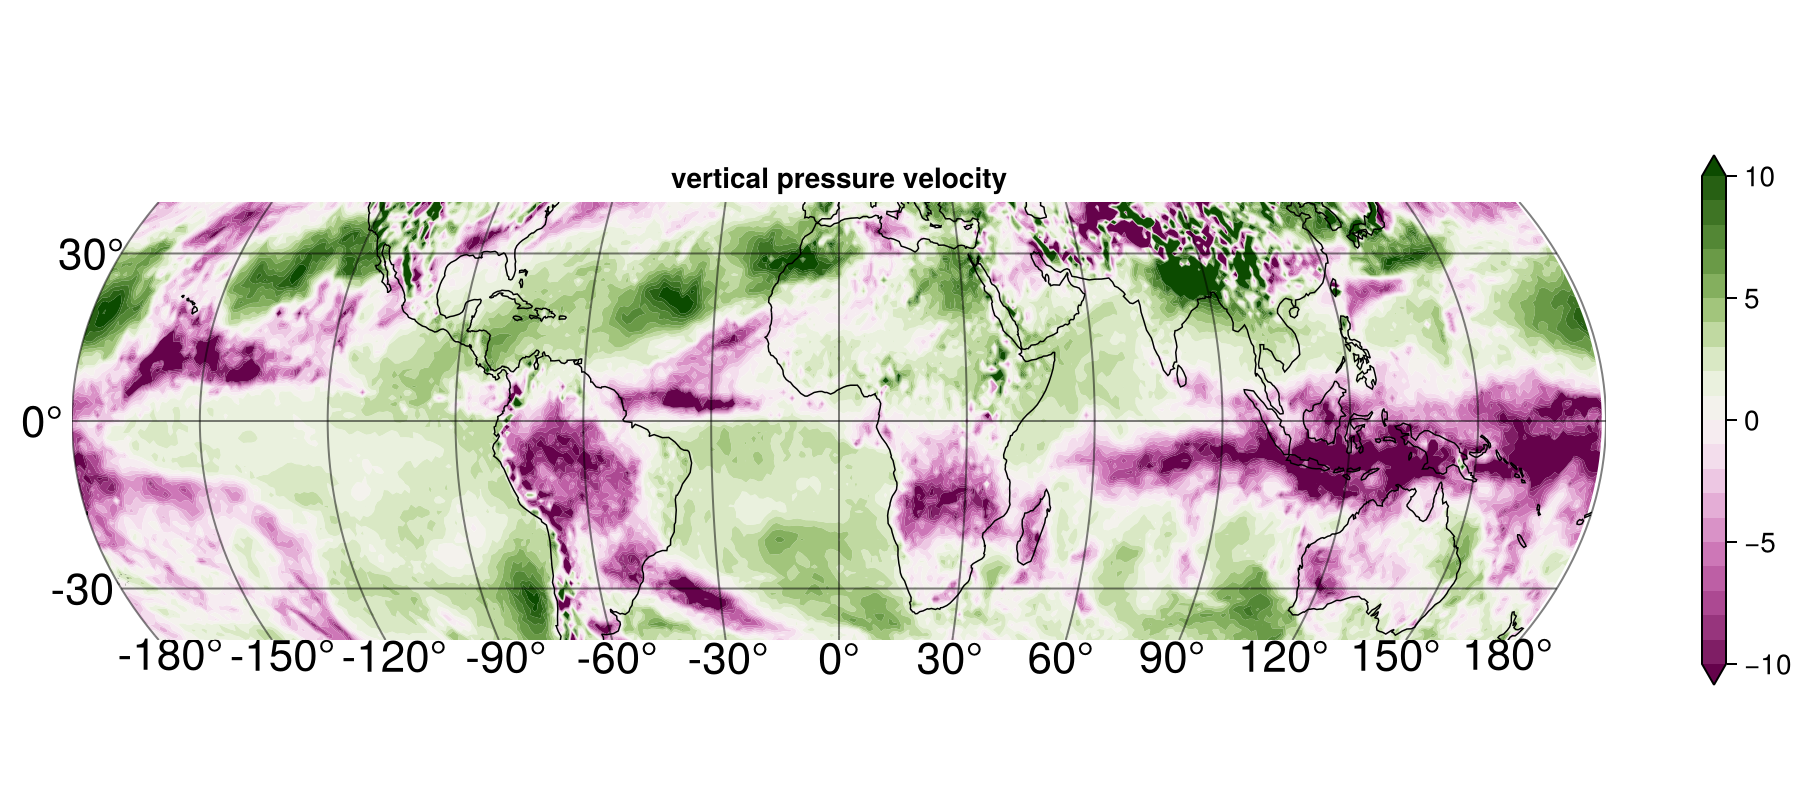

In [5]:
#levs = range(-.02, 0.02, length = 21)
levs = range(-10., 10., length = 21)
blah = fig_anom_plot(100 .* wap[:,:,1,1],lon,lat,"vertical pressure velocity",levs)

In [6]:
#contourf(100 .* wap[:,:,1,1]);

In [83]:
box1      = Array{Union{Missing, Float64}, 4}(undef, 11, 41, 1, dims[4]);
box1_mn   = Array{Union{Missing, Float64}, 1}(undef, dims[4]);
box1_anom = Array{Union{Missing, Float64}, 1}(undef, dims[4]);
box2      = Array{Union{Missing, Float64}, 4}(undef, 11, 41, 1, dims[4]);
box2_mn   = Array{Union{Missing, Float64}, 1}(undef, dims[4]);
box2_anom = Array{Union{Missing, Float64}, 1}(undef, dims[4]);
box3      = Array{Union{Missing, Float64}, 4}(undef, 5, 20, 1, dims[4]);
box3_mn   = Array{Union{Missing, Float64}, 1}(undef, dims[4]);
box3_anom = Array{Union{Missing, Float64}, 1}(undef, dims[4]);

In [84]:
#box1=wap[86:96,21:61,1,:]; # east pacific box
# index = easter Pacific minus western Pacific: box1 - box2
box1=100 .* wap[21:61,86:96,1,:];
#box2=wap[86:96,301:341,1,:]; # west pacific box

In [98]:
#box2=wap[86:96,301:341,1,:];
box2=100 .* wap[301:341,86:96,1,:]; # west pacific box
box3=100 .* wap[141:161,89:94,1,:]; # atlantic box
size(box3)

(21, 6, 420)

In [97]:
#lat1=89:94;
#lon1=141:161;
lat[94]

3.0

In [160]:
size(box2)
#C = collect(2015.083333:1/12:2101);
timeAx  = collect(1990.083333:1/12:2025);
timeAxB = collect(1990.083333:1/12:2024);

In [88]:
size(timeAx)

(420,)

In [89]:
for i in 1:420
    box1_mn[i] = mean(skipmissing(box1[:,:,i]));
    box2_mn[i] = mean(skipmissing(box2[:,:,i]));
    box3_mn[i] = mean(skipmissing(box3[:,:,i]));
end
for i in 1:420
    box1_anom[i] = box1_mn[i] .- mean(box1_mn);
    box2_anom[i] = box2_mn[i] .- mean(box2_mn);
    box3_anom[i] = box3_mn[i] .- mean(box3_mn);
end

In [90]:
smooth_ts(box1_mn,420)
box1_mn_sm = ts_sm;
smooth_ts(box2_mn,420)
box2_mn_sm = ts_sm;
smooth_ts(box3_mn,420)
box3_mn_sm = ts_sm;
walk_pac = box1_mn_sm .- box2_mn_sm;

In [91]:
smooth_ts(box1_anom,420)
box1_mn_an = ts_sm;
smooth_ts(box2_anom,420)
box2_mn_an = ts_sm;
smooth_ts(box3_anom,420)
box3_mn_an = ts_sm;
walk_pac_an = box1_mn_an .- box2_mn_an;

In [66]:
mean(box1_mn)

1.193950151199741

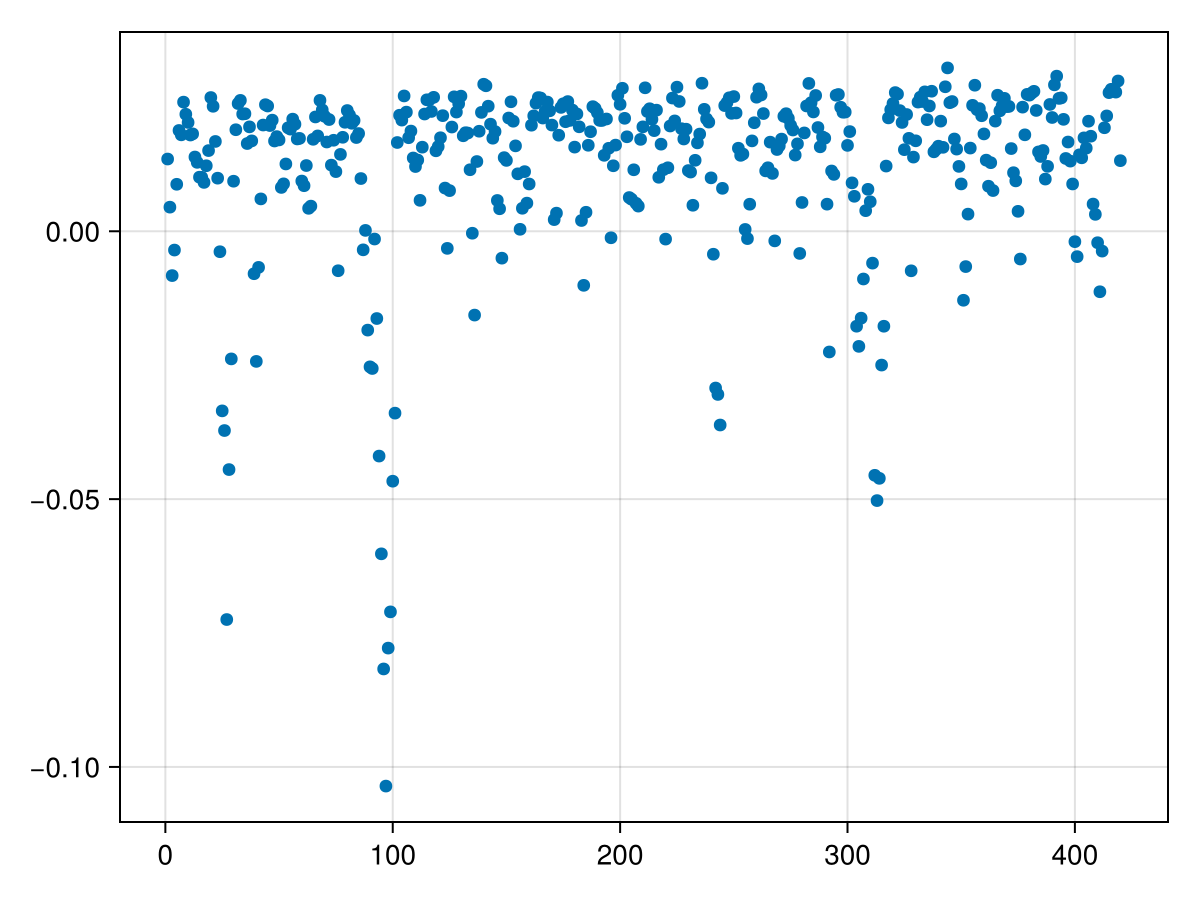

In [47]:
plot(box1_mn)

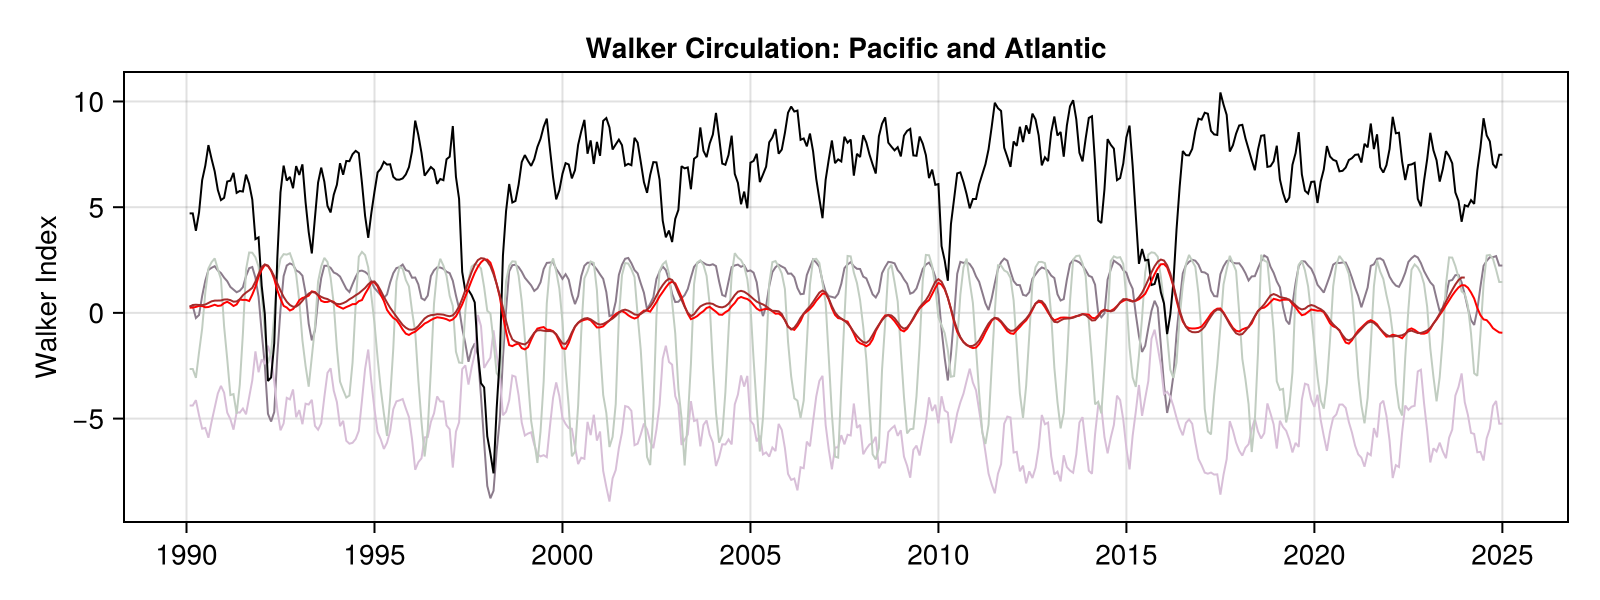

In [162]:
fig = Figure(;
    size = (800,300),
    )
ax = Axis(fig[1,1];
    xlabel=" ",
    ylabel="Walker Index",
    #xticks=([1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]),
    #xticks=([1850,1870,1890,1910,1930,1950,1970,1990,2010,2030,2050,2070,2090]),
    xticks=([1990,1995,2000,2005,2010,2015,2020,2025]),
    title="Walker Circulation: Pacific and Atlantic"
    )
#lines!(ax, timeAx,box1_mn[:],
#    linewidth = 1.00,
#    color = "thistle4"
#    #label = " MPI-ESM1: RONI"
#    )
#lines!(ax, timeAx,box2_mn[:],
#    linewidth = 1.00,
#    color = "thistle"
#    )
#lines!(ax, timeAx,box3_mn[:],
#    linewidth = 1.00,
#    color = "honeydew3"
#    )
lines!(ax, timeAx,box1_mn_sm[:],
    linewidth = 1.00,
    color = "thistle4",
    label = "box 1"
    )
lines!(ax, timeAx,box2_mn_sm[:],
    linewidth = 1.00,
    color = "thistle",
    label = "box2"
    )
lines!(ax, timeAx,box3_mn_sm[:],
    linewidth = 1.00,
    color = "honeydew3",
    label = "Atlantic Walker"
    )
lines!(ax, timeAx,walk_pac[:],
    linewidth = 1.00,
    color = "black",
    label = "Pacific Walker"
    )
#lines!(ax, timeAx,blah3[:],
lines!(ax, timeAx,roni_era5[:],
    linewidth = 1.00,
    color = "red",
    label = "RONI era5"
    )
#lines!(ax, timeAx,shortRoni[:],
#    linewidth = 1.00,
#    color = "brown",
#    label = "RONI obs"
#    )
lines!(ax, timeAxB,shortRoni[:],
    linewidth = 1.00,
    color = "brown",
    label = "RONI obs"
    )
#axislegend( position=:rb)
fig

In [163]:
save("testWalkerTSnoAnom.png", fig; px_per_unit=12.0)

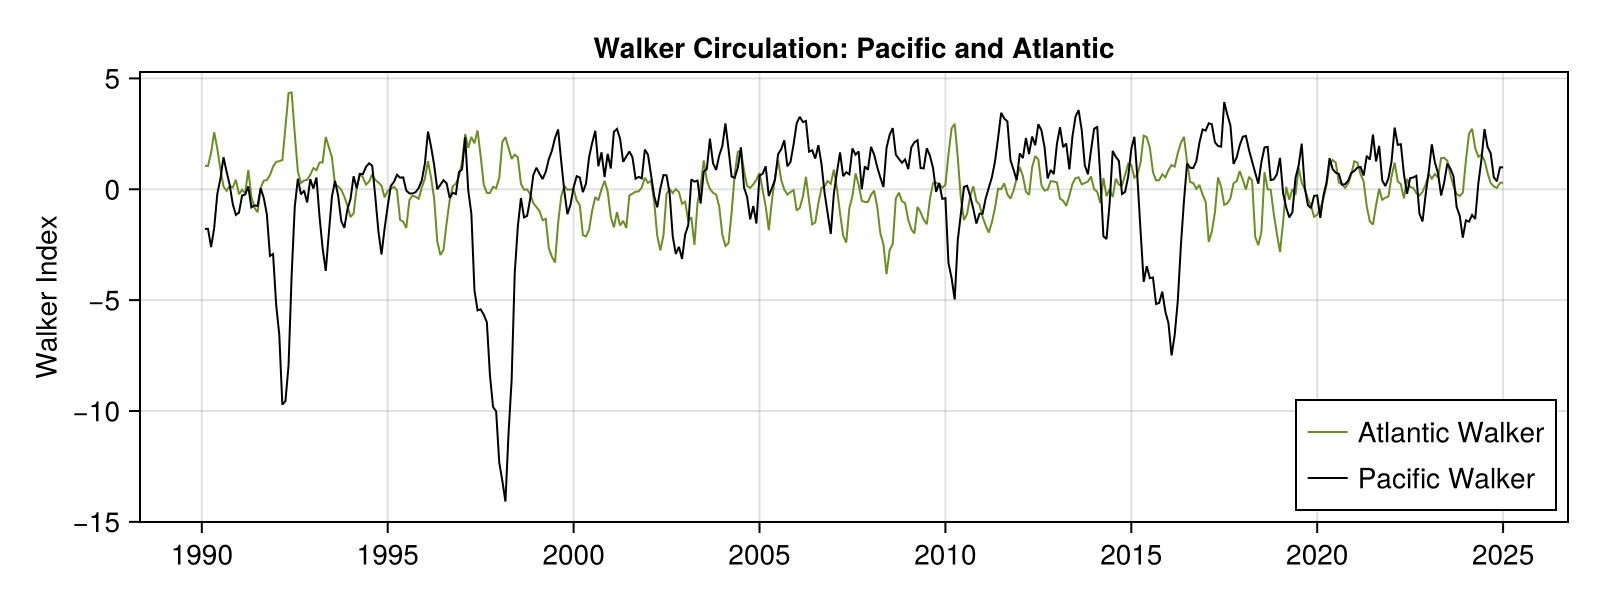

In [164]:
fig = Figure(;
    size = (800,300),
    )
ax = Axis(fig[1,1];
    xlabel=" ",
    ylabel="Walker Index",
    xticks=([1990,1995,2000,2005,2010,2015,2020,2025]),
    title="Walker Circulation: Pacific and Atlantic"
    )
lines!(ax, timeAx,box3_mn_an[:],
    linewidth = 1.00,
    #color = "honeydew3",
    color = "olivedrab",
    label = "Atlantic Walker"
    )
lines!(ax, timeAx,walk_pac_an[:],
    linewidth = 1.00,
    color = "black",
    label = "Pacific Walker"
    )
axislegend( position=:rb)
#box1_mn_sm
fig

In [113]:
# to compute the anomalies, as in Want, 2005, Chapter 6, we need to remove the seasonal cycle.  

tlength = 420;
sst   = zeros(12)
jan   = [mean([box3_mn[i] for i in 1:12:tlength])]
feb   = [mean([box3_mn[i] for i in 2:12:tlength])]
mar   = [mean([box3_mn[i] for i in 3:12:tlength])]
apr   = [mean([box3_mn[i] for i in 4:12:tlength])]
may   = [mean([box3_mn[i] for i in 5:12:tlength])]
jun   = [mean([box3_mn[i] for i in 6:12:tlength])]
jul   = [mean([box3_mn[i] for i in 7:12:tlength])]
aug   = [mean([box3_mn[i] for i in 8:12:tlength])]
sep   = [mean([box3_mn[i] for i in 9:12:tlength])]
oct   = [mean([box3_mn[i] for i in 10:12:tlength])]
nov   = [mean([box3_mn[i] for i in 11:12:tlength])]
dec   = [mean([box3_mn[i] for i in 12:12:tlength])]
ss    = [jan feb mar apr may jun jul aug sep oct nov dec]
global ts_bx3_nsc = zeros(tlength) # time series of nino3.4 without seasonal cycle
for i in 1:12:tlength
   ts_bx3_nsc[i]    = box3_mn[i]    - ss[1]
   ts_bx3_nsc[i+1]  = box3_mn[i+1]  - ss[2]
   ts_bx3_nsc[i+2]  = box3_mn[i+2]  - ss[3]
   ts_bx3_nsc[i+3]  = box3_mn[i+3]  - ss[4]
   ts_bx3_nsc[i+4]  = box3_mn[i+4]  - ss[5]
   ts_bx3_nsc[i+5]  = box3_mn[i+5]  - ss[6]
   ts_bx3_nsc[i+6]  = box3_mn[i+6]  - ss[7]
   ts_bx3_nsc[i+7]  = box3_mn[i+7]  - ss[8]
   ts_bx3_nsc[i+8]  = box3_mn[i+8]  - ss[9]
   ts_bx3_nsc[i+9]  = box3_mn[i+9]  - ss[10]
   ts_bx3_nsc[i+10] = box3_mn[i+10] - ss[11]
   ts_bx3_nsc[i+11] = box3_mn[i+11] - ss[12]
end


In [108]:
smooth_ts(ts_bx3_nsc,420)
box3_mn_an = ts_sm;

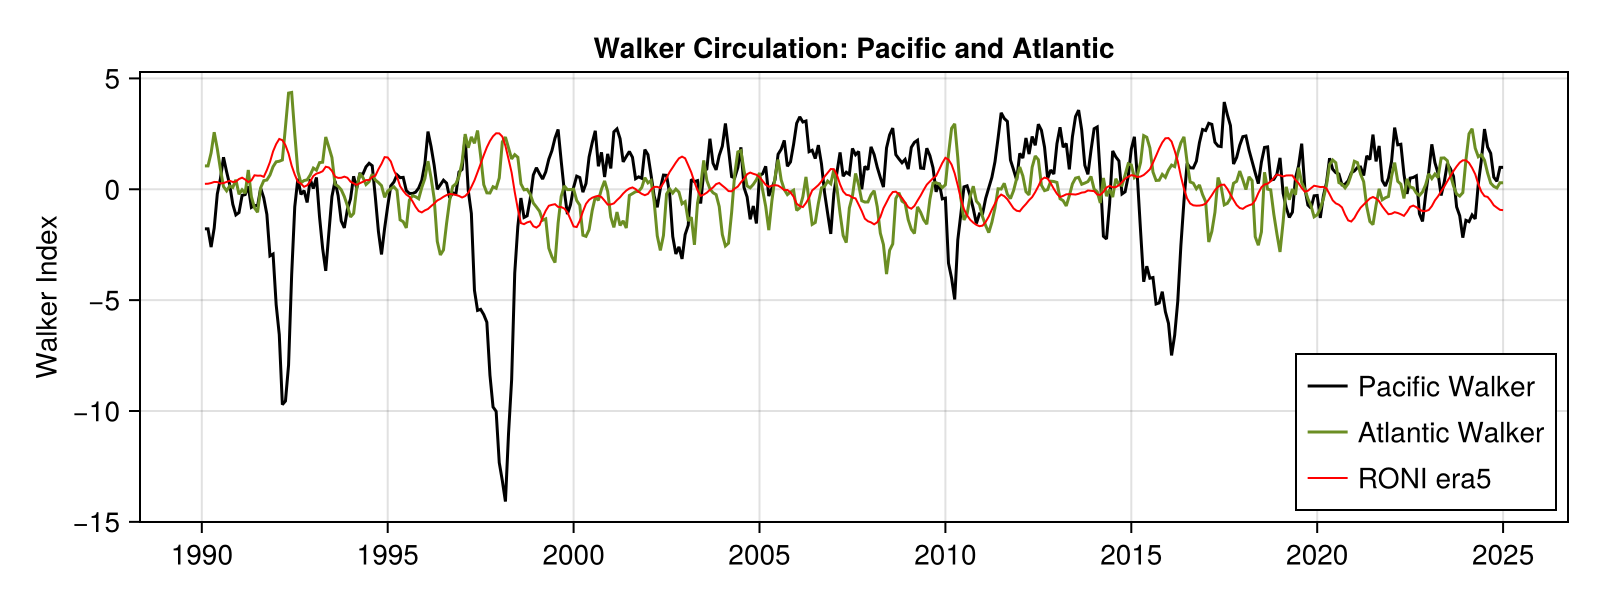

In [165]:
fig = Figure(;
    size = (800,300),
    )
ax = Axis(fig[1,1];
    xlabel=" ",
    ylabel="Walker Index",
    xticks=([1990,1995,2000,2005,2010,2015,2020,2025]),
    title="Walker Circulation: Pacific and Atlantic"
    )
lines!(ax, timeAx,walk_pac_an[:],
    linewidth = 1.5,
    color = "black",
    label = "Pacific Walker"
    )
lines!(ax, timeAx,box3_mn_an[:],
    linewidth = 1.5,
    #color = "honeydew3",
    color = "olivedrab",
    label = "Atlantic Walker"
    )
lines!(ax, timeAx,roni_era5[:],
    linewidth = 1.00,
    color = "red",
    label = "RONI era5"
    )
#lines!(ax, timeAx,ts_bx3_nsc[:],
#    linewidth = 1.00,
#    #color = "honeydew3",
#    color = "red",
#    label = "Atlantic Walker"
#    )
axislegend( position=:rb)
#box1_mn_sm
fig

In [112]:
save("WalkerTSnoAnomERA5.png", fig; px_per_unit=12.0)

In [166]:
size(box3_mn_an)

(420,)

In [167]:
size(roni_era5)

(420,)

In [168]:
RepSuck = cor(box3_mn_an,roni_era5)

0.3333899176243163

In [169]:
TruSuck = cor(walk_pac_an,roni_era5)

-0.6373940623823985